In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

plt.style.use('seaborn-darkgrid')

In [2]:
from pathlib import Path


In [3]:
dir = Path.cwd()
file = dir/'file/sh_ipc_aperturas.xls'
print(file)

/home/guillorocker/Desktop/python/jupyternotebook/file/sh_ipc_aperturas.xls


In [4]:
# Se observan multiples tablas en la sheet, se procede a crear una funcion que levante dichas tablas y devuelva una lista 
# de DF.o

In [5]:
def get_df_from_excel_sheets(file):
    """Obtiene un Dataframe por cada tabla en la sheet"""

    df_list = []
    try:
        m_df = pd.ExcelFile(file)
    except Exception as e:
        raise FileNotFoundError(f'No se pudo leer el archivo: {e}')

    nrows = m_df.book.sheet_by_name('Índices aperturas').nrows
    skrow = 5
    skfooter = nrows - 51
    count_tables = 0
    while nrows > 0:
        if skfooter > 0:
            df = m_df.parse(2, skiprows=skrow,skipfooter=skfooter,
                            parse_dates=True).dropna(axis=0, how='all')
            df_list.append(df)
            if count_tables < 1:
                skrow = skrow + 51
                skfooter = skfooter - 50
                nrows = nrows - 50
                count_tables = count_tables + 1
            else:
                skrow = skrow + 49
                skfooter = skfooter - 49
                nrows = nrows - 49
                count_tables = count_tables + 1
        else:
            break

    return df_list

In [6]:
dir = Path.cwd()
file = dir/'file/sh_ipc_aperturas.xls'
print(file)

/home/guillorocker/Desktop/python/jupyternotebook/file/sh_ipc_aperturas.xls


In [7]:
df_list = get_df_from_excel_sheets(file)

for df in df_list:
    print(df.shape)

(44, 75)
(43, 75)
(43, 75)
(43, 75)
(43, 75)
(43, 75)


In [8]:
for df in df_list:
    print(df.describe())

       2016-12-01  2017-01-01  2017-02-01  2017-03-01  2017-04-01  2017-05-01  \
count        44.0   44.000000   44.000000   44.000000   44.000000   44.000000   
mean        100.0  101.488593  104.138175  106.571602  109.355109  110.800170   
std           0.0    1.580585    3.545253    5.343678    7.720645    7.437551   
min         100.0   97.304400   96.490900   99.978900   99.354000  101.131900   
25%         100.0  100.576475  102.987275  104.180750  106.096075  107.502625   
50%         100.0  101.465350  103.975050  105.690300  107.981150  109.377650   
75%         100.0  102.293550  105.294475  107.210325  109.589525  111.691575   
max         100.0  104.661300  117.597500  132.893600  149.213700  149.844600   

       2017-06-01  2017-07-01  2017-08-01  2017-09-01  ...   2022-04-01  \
count   44.000000   44.000000   44.000000   44.000000  ...    44.000000   
mean   112.253770  114.200068  116.194248  118.563927  ...   690.929098   
std      7.712522    7.645138    8.150288    

       2016-12-01  2017-01-01  2017-02-01  2017-03-01  2017-04-01  2017-05-01  \
count        43.0   43.000000   43.000000   43.000000   43.000000   43.000000   
mean        100.0  102.593902  104.679772  106.996349  109.227681  111.048842   
std           0.0    2.750809    2.921470    4.628030    5.700542    5.753538   
min         100.0   98.108900   96.678900   97.729800  100.277200  103.776000   
25%         100.0  101.138550  103.004650  104.906250  106.590500  107.641300   
50%         100.0  101.949600  104.985200  106.557900  108.434700  109.422300   
75%         100.0  102.957200  105.702150  107.471300  110.011250  112.666550   
max         100.0  114.926900  115.788500  124.067300  133.737500  135.037400   

       2017-06-01  2017-07-01  2017-08-01  2017-09-01  ...   2022-04-01  \
count   43.000000   43.000000   43.000000   43.000000  ...    43.000000   
mean   112.214988  114.183026  116.411207  118.016853  ...   680.226012   
std      6.271732    6.831030    7.496252    

In [9]:
#visualizando los datos se detecta que existen datos nulos con el siguiente valor '///', se procede a cambiar los datos 
# a None

In [10]:
list_df_with_none = []
for df in df_list:
    df = df.replace('///', None)
    list_df_with_none.append(df)

In [11]:
len(list_df_with_none)

6

In [12]:
## comprobamos que se cambiaron los datos con null
for df in list_df_with_none:
    print(df.isnull().sum().sum())

6
6
6
6
6
6


In [13]:
## remplazamos los datos faltantes con el metodo fffil
list_df_completed = []
for df in list_df_with_none:
    df = df.fillna(method='ffill', axis=0)
    list_df_completed.append(df)
len(list_df_completed)

6

In [14]:
## comprobamos que se cambiaron los datos
for df in list_df_completed:
    print(df.isnull().sum().sum())

0
0
0
0
0
0


In [15]:
#realizamos una transposicion de los datos y cargamos el dato de la region en un nueva columna

In [16]:
def transpose_df(list_df):
    """Apartir de una lista de DF, transpone los datos, formatea las fechas y los numeros."""
    new_list = []
    for df in list_df:
        df1 = df.T
        df = df1[1:]
        df.index = pd.to_datetime(df.index)
        df = df.apply(pd.to_numeric)
        df.columns = df1.iloc[0]
        new_list.append(df)
    return new_list

In [17]:
list_df_transposed = transpose_df(list_df_completed)

In [18]:
for df in list_df_transposed:
    print(df.describe())
    print(df.shape)
    print(df.isnull().sum().sum())

Región GBA  Nivel general  Alimentos y bebidas no alcohólicas    Alimentos  \
count           74.000000                           74.000000    74.000000   
mean           362.511946                          381.360535   389.352436   
std            272.203069                          294.528059   305.011486   
min            100.000000                          100.000000   100.000000   
25%            146.073100                          144.041625   144.722850   
50%            283.834400                          293.420550   294.505500   
75%            481.673700                          515.907100   529.531450   
max           1180.967000                         1257.145500  1287.897000   

Región GBA  Pan y cereales  Carnes y derivados  \
count            74.000000           74.000000   
mean            371.532669          392.267577   
std             279.991175          309.990558   
min             100.000000           98.863200   
25%             151.940500          136.518550 

Región Cuyo  Nivel general  Alimentos y bebidas no alcohólicas    Alimentos  \
count            74.000000                           74.000000    74.000000   
mean            380.457705                          397.926282   401.852914   
std             291.072600                          313.242445   319.051881   
min             100.000000                          100.000000   100.000000   
25%             146.972975                          144.026125   143.966375   
50%             294.119250                          298.244900   296.954650   
75%             519.517800                          552.258700   560.324575   
max            1246.148800                         1300.912800  1317.286800   

Región Cuyo  Pan y cereales  Carnes y derivados  \
count             74.000000           74.000000   
mean             392.035426          396.953572   
std              304.552165          311.554161   
min              100.000000          100.000000   
25%              154.466700      

In [19]:
#agregamos la columna region como parte del dataset.
def add_new_colum_to_df(list_df, colname, colvalue):
    """Apartir de una lista de DF, Agrega una nueva columna a un df, retorna una lista df"""
    new_list = []
    for df in list_df:
        df = df[colname] = colvalue
        new_list.append(df)
        
    return new_list

In [20]:
list_df_new_column = []
colname = 'Region'
for df in list_df_transposed:
    colvalue = df.columns.name
    df[colname] = colvalue
    list_df_new_column.append(df)
len(list_df_new_column)

6

In [21]:
for df in list_df_new_column:
    print(df.head())

Región GBA  Nivel general  Alimentos y bebidas no alcohólicas  Alimentos  \
2016-12-01       100.0000                            100.0000   100.0000   
2017-01-01       101.3130                            101.3069   101.2848   
2017-02-01       103.8085                            103.1646   103.3191   
2017-03-01       106.2627                            106.7878   107.1358   
2017-04-01       109.0613                            109.2144   109.6145   

Región GBA  Pan y cereales  Carnes y derivados  \
2016-12-01        100.0000            100.0000   
2017-01-01        101.5263             98.9006   
2017-02-01        103.7498             98.8632   
2017-03-01        106.6043            104.1811   
2017-04-01        108.8026            106.8365   

Región GBA  Leche, productos lácteos y huevos  Aceites, grasas y manteca  \
2016-12-01                           100.0000                   100.0000   
2017-01-01                           102.1541                   101.6830   
2017-02-01    

In [22]:
#graficamos la evolucion de los niveles generales de cada region

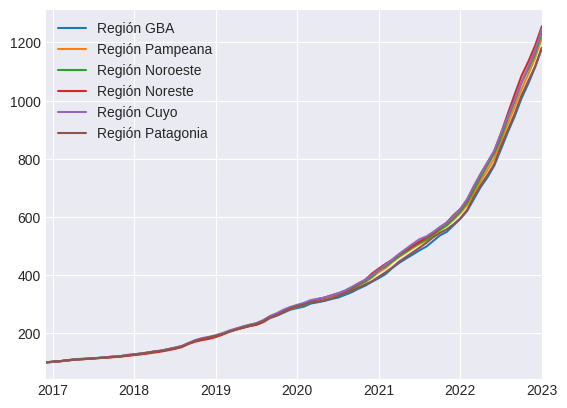

In [23]:
for df in list_df_new_column:
    ax = df['Nivel general'].plot()
    ax.legend([c.columns.name for  c in list_df_new_column])

In [24]:
#graficamos los rubros que mas crecieron en las distintas regiones

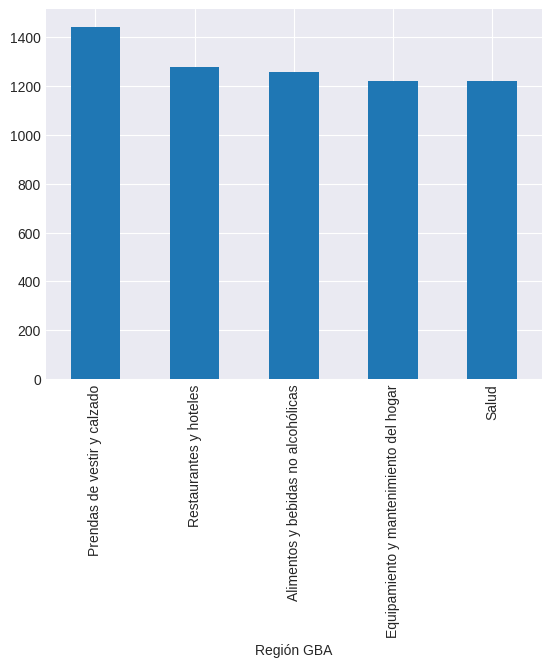

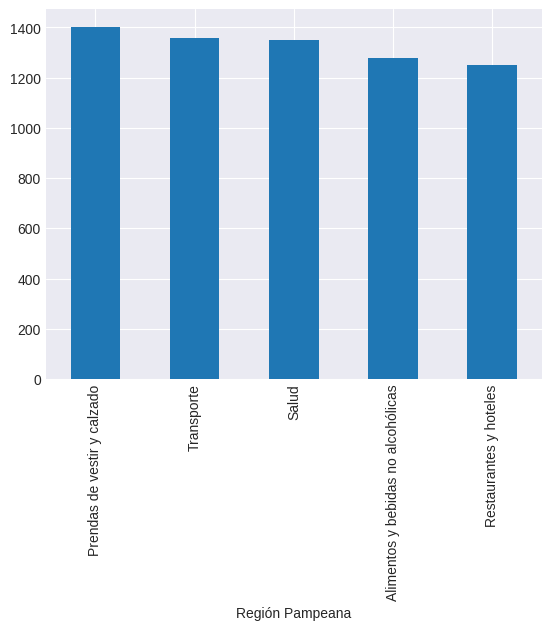

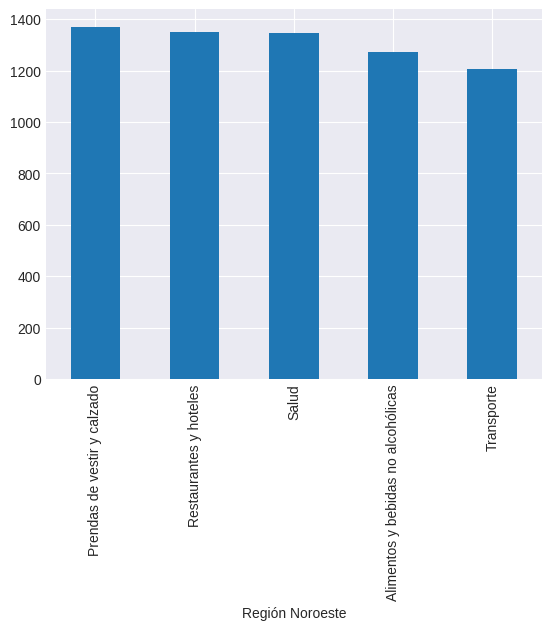

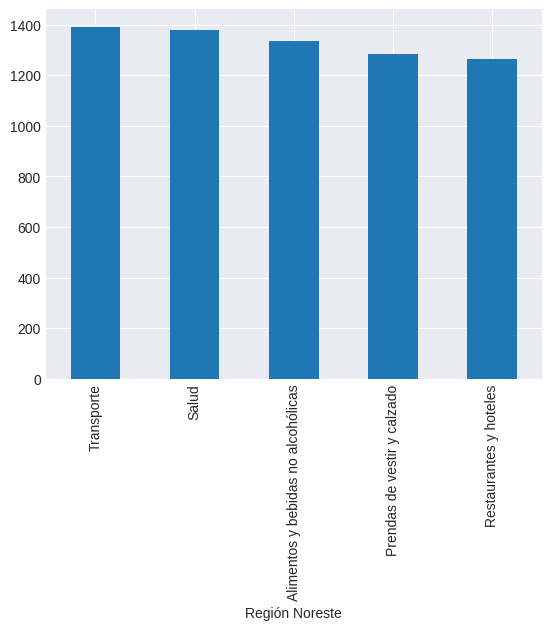

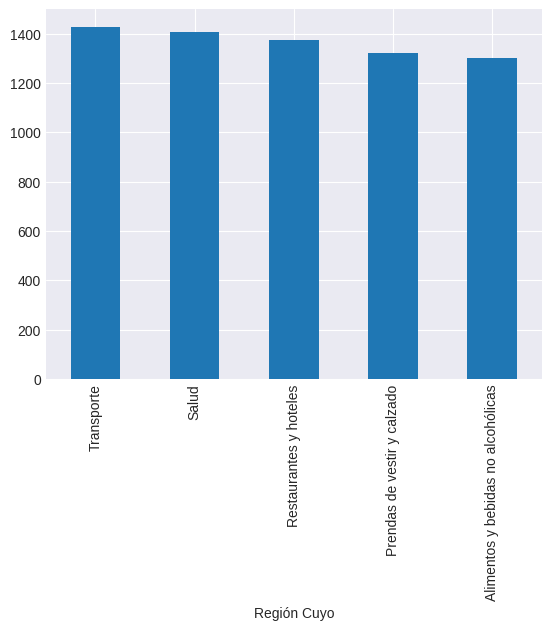

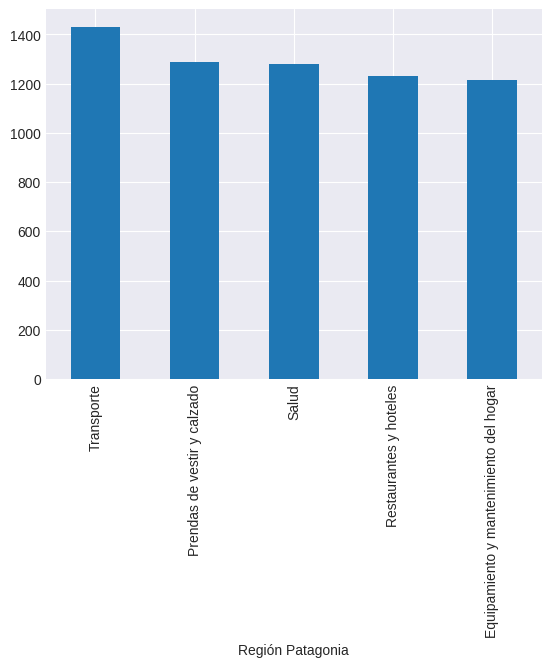

In [30]:
cols = ['Alimentos y bebidas no alcohólicas','Bebidas alcohólicas y tabaco','Prendas de vestir y calzado','Vivienda, agua, electricidad, gas y otros combustibles','Equipamiento y mantenimiento del hogar','Salud','Transporte','Comunicación','Recreación y cultura','Educación','Restaurantes y hoteles','Bienes y servicios varios']
for i in range(len(list_df_new_column)):
    ax = list_df_new_column[i][cols].max().sort_values(ascending=False).head(5).plot.bar()
    #ax.legend([cols])
    plt.show()
